In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [4]:
def decision_boundary(X, y, theta, ax=None, threshold=0.5, contourf=False):
    x_label = [np.min(X[:, 1]), np.max(X[:, 2])]
    y_label = - (theta[0] + np.dot(theta[1], x_label)) / theta[2]

    plt.plot(x_label, y_label, label='Decision Boundary')
    plt.xlabel('1st Exam')
    plt.ylabel('2nd Exam')
    plt.legend()
    plt.show()

In [5]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [7]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [8]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    
    return J

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot(X.T, (h(X, theta) - y)) / m
    
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        delta = derivative_theta(X, y, theta)
        theta = theta - alpha * delta
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [12]:
def predict(X, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions.round(0)

In [13]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


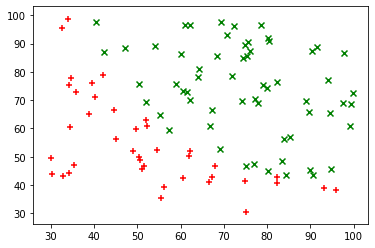

In [14]:
plot_data(X, y)

In [15]:
X_new, mean, std = normalize(X)

In [16]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [17]:
theta = np.array([0, 0, 0])
#theta = np.zeros((X_new.shape[1], 1))

In [18]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [19]:
new_theta, Js = gradient_descent(X_new, y, theta, 0.01, 1e-7, 1000000, False)
print(new_theta, len(Js))

[1.56245168 3.66099854 3.40417088] 24696


In [20]:
cost_function(X_new, y_new, new_theta)

2.0882181832122506

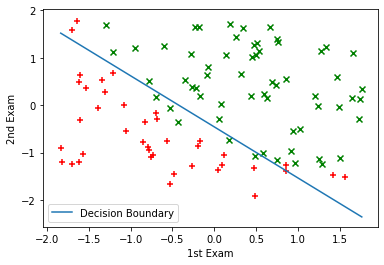

In [21]:
plot_data((X-mean)/std, y)

X_plot = prepare_X((X-mean)/std)
decision_boundary(X_plot, y, new_theta, ax=None, threshold=0.5, contourf=False)

In [22]:
T = np.array([[40, 40], [60, 65]])
T_new, mean, std = normalize(T)
print(predict(T_new, new_theta))

[0. 1.]


In [23]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
data_columns = ["test1", "test2", "test1test1", "test2test2", "test1test2", "test1test1test1", "test2test2test2"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(118, 7), y=(118,)


In [24]:
def new_decision_boundary(X, y, theta, ax=None, threshold=0.5, contourf=False):
    
    xx1, xx2 = np.meshgrid(np.linspace(X.min(), X.max(), 100), 
                           np.linspace(y.min(), y.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx2.ravel()**2, xx1.ravel()*xx2.ravel(), xx1.ravel()**3, xx2.ravel()**3]
    pred = predict(X_pred, theta)
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((X.min(), X.max()))
    ax.set_ylim((y.min(), y.max()))
    
    plt.xlabel('1st Test')
    plt.ylabel('2nd Test')
    plt.show()

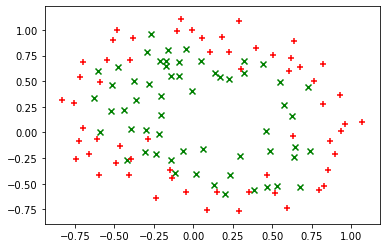

In [25]:
plot_data(X, y)

In [26]:
X_new, mean, std = normalize(X)

In [27]:
X_new = prepare_X(X)
y_new = y.values.reshape((X.shape[0], 1))

In [28]:
theta = np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [30]:
new_theta, Js = gradient_descent(X_new, y, theta, 0.01, 1e-7, 100000, False)
print(new_theta, len(Js))

[ 3.75267172  2.31109126  3.84199573 -8.95997441 -7.6575796  -4.9596086
 -0.28045867 -2.40818053] 100001


In [31]:
cost_function(X_new, y_new, new_theta)

1.1383316293342516

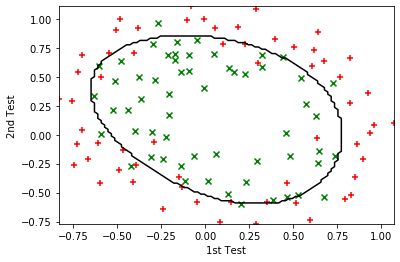

In [32]:
plot_data(X, y)

new_decision_boundary(X["test1"], X["test2"], new_theta, ax=None, threshold=0.5, contourf=False)